# Jarque-Bera test to check normality

1. Jarque-Bera test

Jarque-Bera test is a goodnes-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test is always nonnegative. If it is far fron zero, it signal the data do not have a normal distribution. 
The test statistic JB is defined as

$$JB=\frac{n}{6} \left( S^2+\frac{1}{4}(K-3)^2 \right)$$

Where **n** is the number of observations and **S** is sample skewnees and **K** is the sample kurtosis
$$S=\frac{\hat{\mu}_3}{\hat{\sigma}^3} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^3 }{\left(\frac{1}{n}\sum(x_i-\bar{x})^2 \right)^{\frac{3}{2}}}$$
$$K=\frac{\hat{\mu}_4}{\hat{\sigma}^4} = \frac{\frac{1}{n}\sum(x_i-\bar{x})^4 }{\left(\frac{1}{n}\sum(x_i-\bar{x})^2 \right)^{2}}$$

If the data comes from a normal distribution, JB statistic asymptotically has a chi-squarted distribution with two degrees of freedom, it is used to test that the data come from a normal distribution. Samples from a normal distributions have an expected S=0 and K-3=0 (for a normal standard). The null hipotesis is skewness and exces if kurtosis equals 0 (S=0,K-3=0)


2. p-Value

In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypotesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

**Definition**
Consider an observed test-statisctic $t$ from unknown distribution $T$. Then the p-value $p$ is whart the prior probability would be of observing a test-statistic value at least as "extreme" as $t$ if the null hypothesis $H_0$. 
That is:

$p=Pr(T\geq t | H_0) $ for one side right-tail test statistic distribution 

$p=Pr(T\leq t | H_0) $ for one side left-tail test statistic distribution 

$p=Pr(|T|\geq |t| | H_0) $ for two side distribution symetric about zero

Then we check the probability $p$ obtained with the statistic $t$ and if it less than a given confidence level $\alpha (0.05=1-.95) $ we reject the hypotesis. If pvalue is greater than $\alpha (0.05)$ we cannot conclude that the distribution follow $T$ but at least we cannot reject the hypotesis (is statistical significative)

3. ¿que hacer cuando una distribucion de normalidad falla su test de normalidad?



kurtosis is 0.0010043871438565333
skew is 0.00026020105225360563
Jarque-Bera statistic is 0.053317161879992456
p-value is :0.9736936223418066
is normal True(at 0.05)


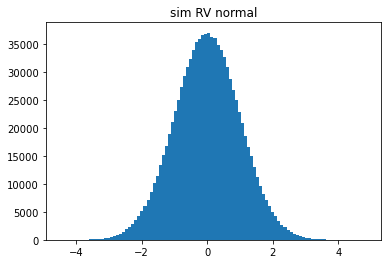

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  2 23:56:40 2021

@author: MRDV
"""

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import importlib
from scipy.stats import skew,kurtosis,chi2

#print("First code")

#simulating random variables
nb_sims=10**6
df=5
lam=2
dist_name= 'normal'
dist_type = 'sim RV'

if dist_name == 'normal':
    x=np.random.standard_normal(nb_sims)
    x_desc= dist_type + ' ' + dist_name
elif dist_name == 'exponential':
    x=np.random.exponential(lam,nb_sims)
    x_desc= dist_type + ' ' + dist_name
elif dist_name == 'uniform':
    x=np.random.uniform(0,2,nb_sims)
    x_desc= dist_type + ' ' + dist_name
elif dist_name == 'student':
    x=np.random.standard_t(df,nb_sims)
    x_desc= dist_type + ' ' + dist_name+' | df='+str(df) 
elif dist_name == 'chi-squared':
    x=np.random.standard_t(df,nb_sims)
    x_desc= dist_type + ' ' + dist_name+' | df='+str(df)

'''
Todays goal - Create Jarque - Bera normality test
'''
x_variance=np.var(x)
x_skew = skew(x)
x_kurtosis = kurtosis(x) #Esta Kurtosis ya esta en exceso (K-3)
x_jarque_bera = nb_sims/6*(x_skew**2+1/4*x_kurtosis**2)
p_value = 1 - chi2.cdf(x_jarque_bera,df=2)
x_is_normal = (p_value>0.05)  #para revisar si el p_value es mayor 1-.95

#jb_list = [] #create a list
#jb_list.append(x_jarque_bera) #Para ir apilando los resultados correr varias veces

print('kurtosis is ' + str(x_kurtosis)) 
print('skew is ' + str(x_skew))
print('Jarque-Bera statistic is ' + str(x_jarque_bera))
print('p-value is :' + str(p_value))
print('is normal ' + str(x_is_normal))
#plot histograms (run all at time)
plt.figure()
plt.hist(x,bins=100)
plt.title(x_desc)
plt.show()